<a href="https://colab.research.google.com/github/Minecka2023/MB_Minetska_3-14/blob/main/LB7_MB_Minetska_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

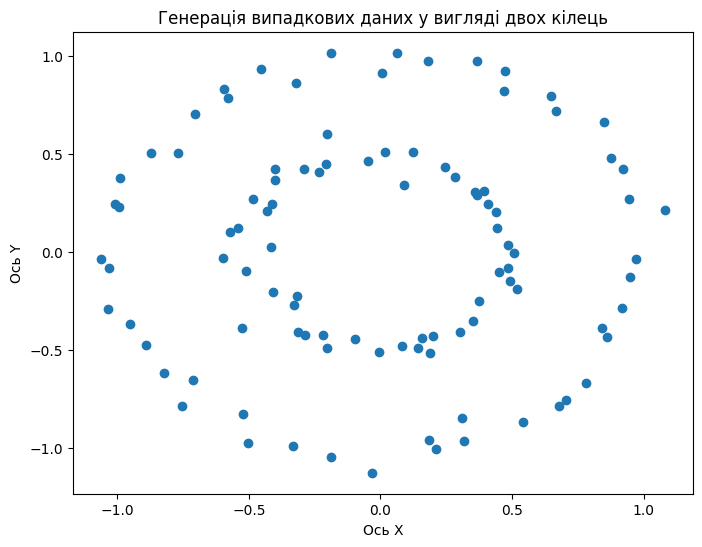

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Генеруємо випадкові дані у вигляді двох кілець
X, _ = make_circles(n_samples=100, factor=0.5, noise=0.05)

# Візуалізуємо дані
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Генерація випадкових даних у вигляді двох кілець')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()


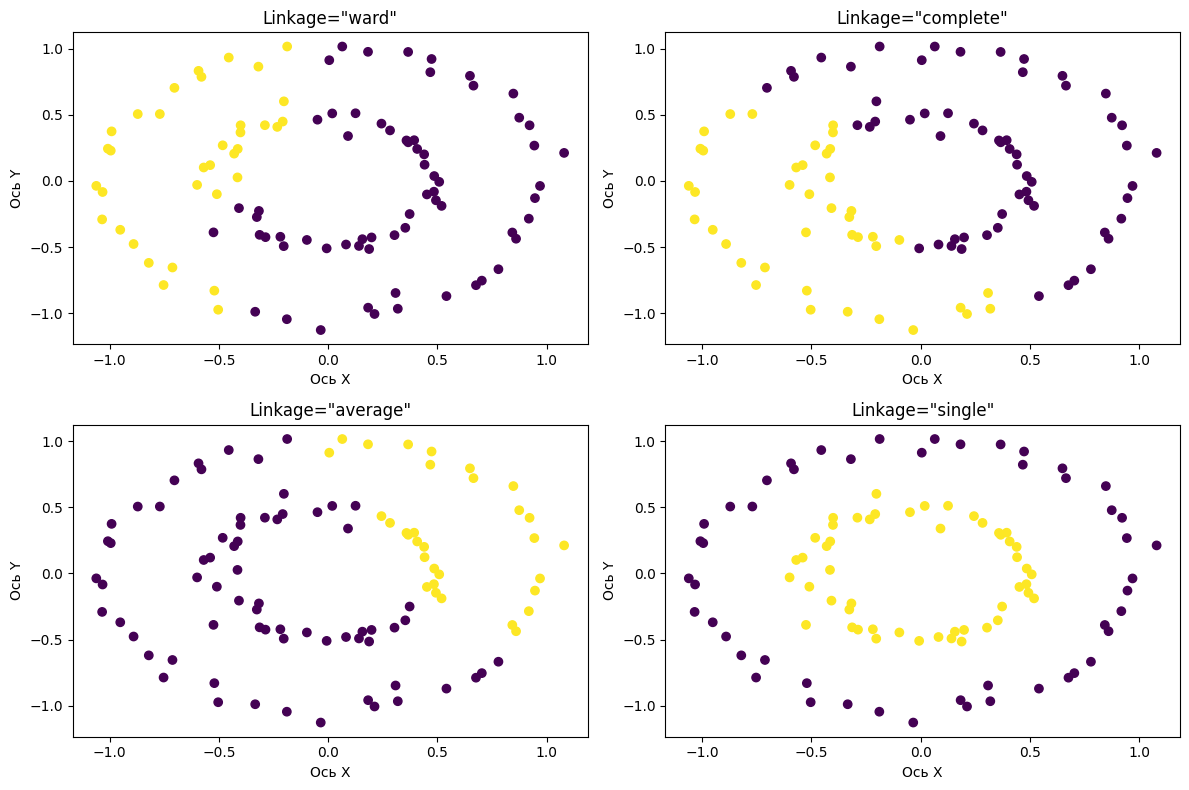

In [ ]:
# Дослідження різних значень linkage
linkage_types = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(12, 8))

for i, linkage_type in enumerate(linkage_types, 1):
    model = AgglomerativeClustering(n_clusters=2, linkage=linkage_type)
    model.fit(X)
    labels = model.labels_

    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'Linkage="{linkage_type}"')
    plt.xlabel('Ось X')
    plt.ylabel('Ось Y')

plt.tight_layout()
plt.show()


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


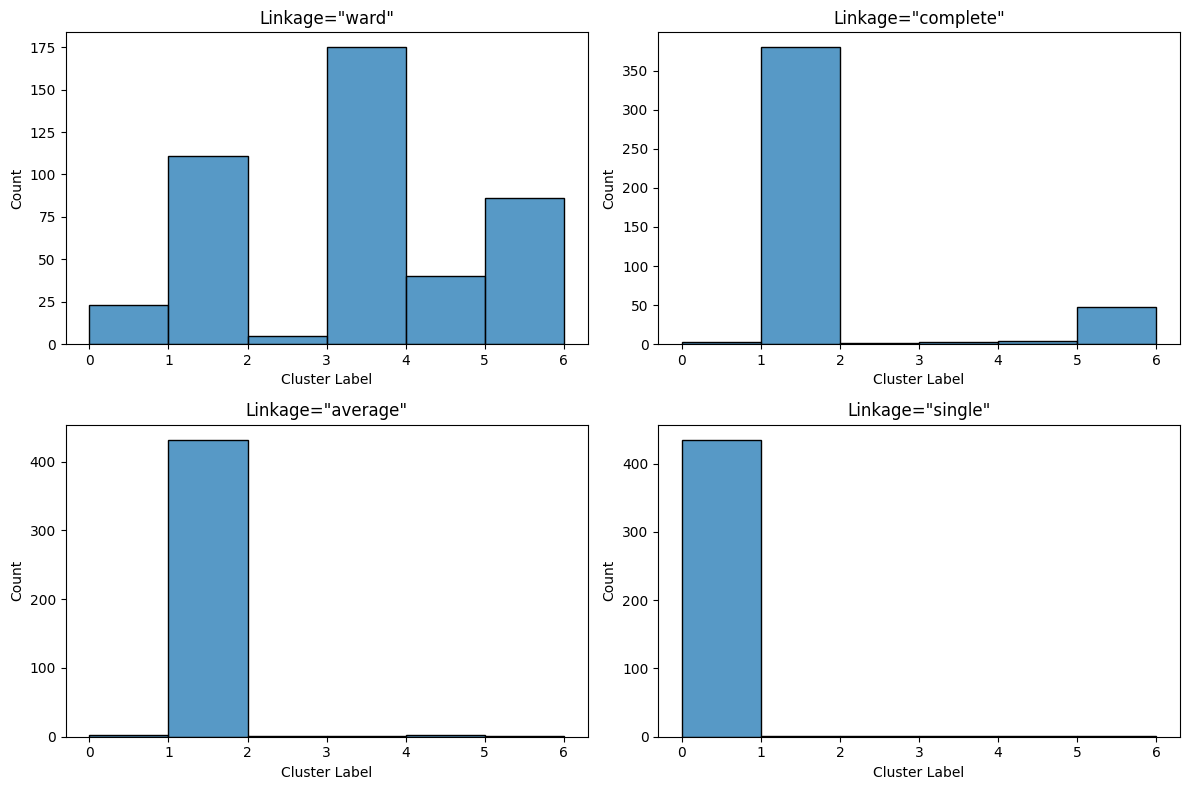

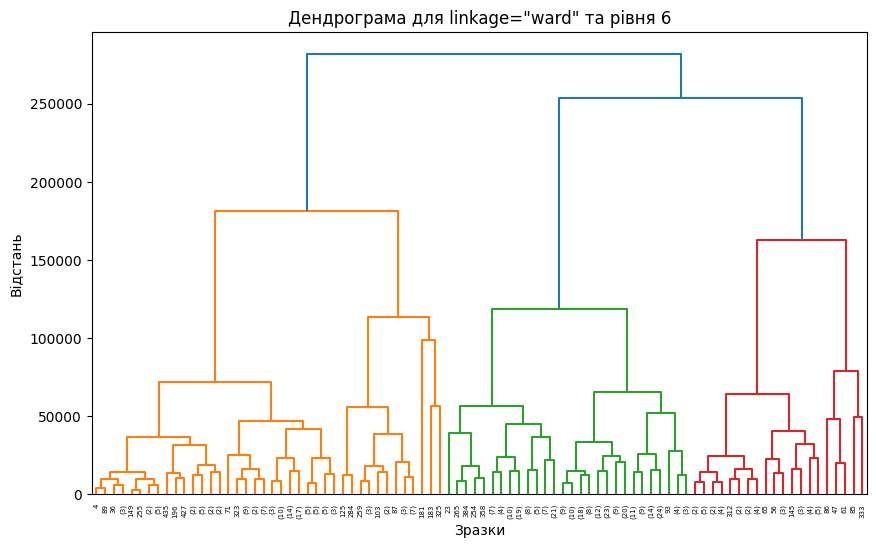

In [ ]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Завантаження даних з файлу tripadvisor_review.csv
url = '/content/Wholesale customers data.csv'
data = pd.read_csv(url)

# Відобразимо перші декілька рядків даних для перевірки
print(data.head())

# Виберемо потрібні стовпці для кластеризації
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].values

# Проведення ієрархічної кластеризації та дослідження різних linkage
linkage_types = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(12, 8))

for i, linkage_type in enumerate(linkage_types, 1):
    model = AgglomerativeClustering(n_clusters=6, linkage=linkage_type)
    labels = model.fit_predict(X)

    plt.subplot(2, 2, i)
    sns.histplot(labels, bins=range(7), kde=False)
    plt.title(f'Linkage="{linkage_type}"')
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Відображення дендрограми для linkage='ward' та рівня 6
Z = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, p=6, truncate_mode='level')
plt.title('Дендрограма для linkage="ward" та рівня 6')
plt.xlabel('Зразки')
plt.ylabel('Відстань')
plt.show()


DBSCAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
Мітки кластерів: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -

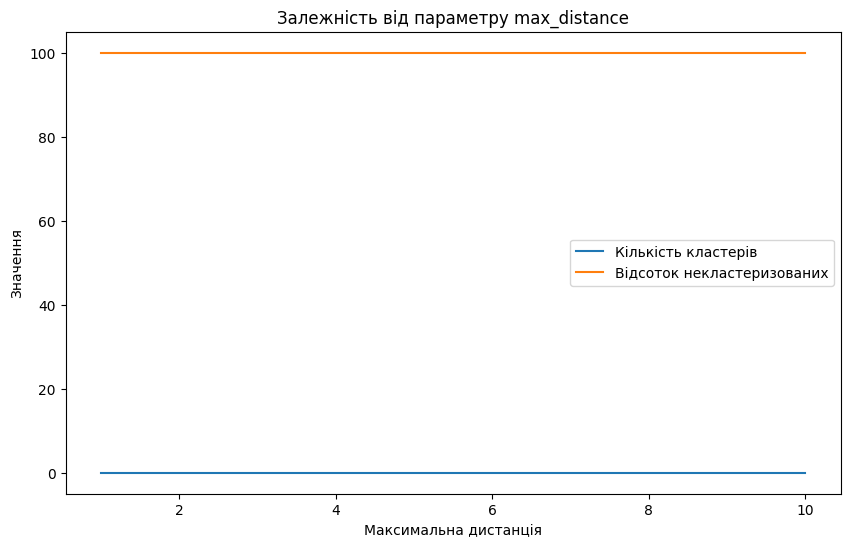

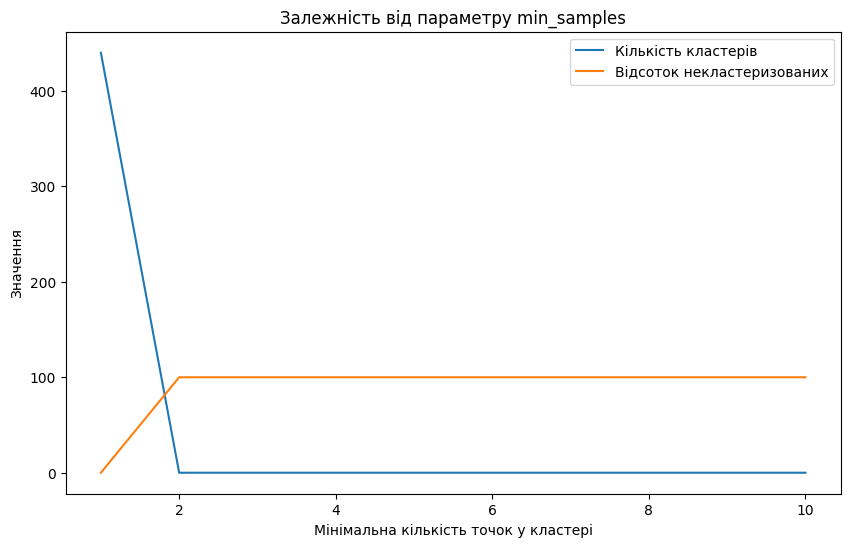

Параметри для вимог:


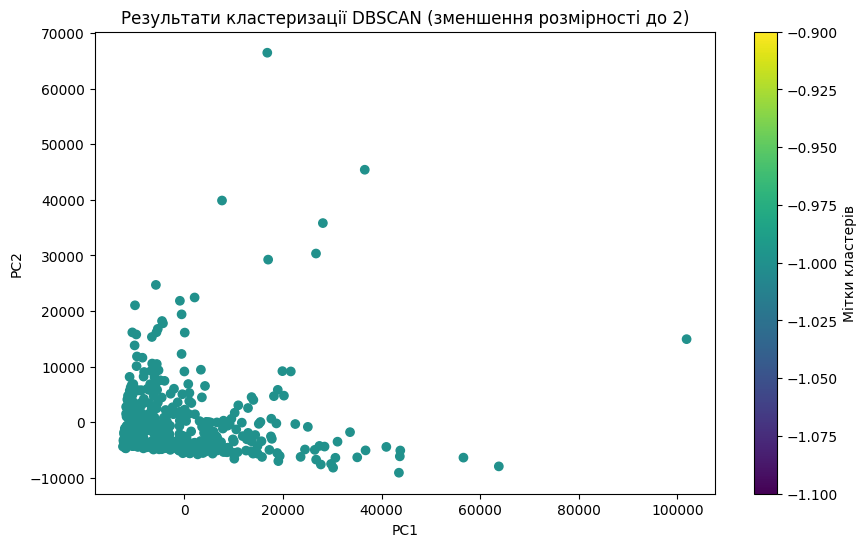

In [ ]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Завантаження даних з файлу Wholesale customers data.csv
url = '/content/Wholesale customers data.csv'
data = pd.read_csv(url)

# Виведення інформації про датасет
print(data.info())

# Вибір потрібних стовпців для кластеризації (наприклад, Fresh та Milk)
X = data[['Fresh', 'Milk']].values

# 1. Проведення кластеризації методом DBSCAN за параметрами за замовчуванням
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)

# Виведення результатів кластеризації
print("Мітки кластерів:", labels)
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
percent_noise = (n_noise / len(labels)) * 100
print("Кількість кластерів:", n_clusters)
print("Відсоток некластеризованих спостережень:", percent_noise)

# 2. Побудова графіка кількості кластерів та відсотка некластеризованих спостережень
max_distances = np.linspace(1, 10, 10)
cluster_counts = []
percent_noises = []

for max_dist in max_distances:
    dbscan = DBSCAN(eps=max_dist)
    labels = dbscan.fit_predict(X)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    percent_noise = (n_noise / len(labels)) * 100
    cluster_counts.append(n_clusters)
    percent_noises.append(percent_noise)

plt.figure(figsize=(10, 6))
plt.plot(max_distances, cluster_counts, label='Кількість кластерів')
plt.plot(max_distances, percent_noises, label='Відсоток некластеризованих')
plt.xlabel('Максимальна дистанція')
plt.ylabel('Значення')
plt.title('Залежність від параметру max_distance')
plt.legend()
plt.show()

# 3. Побудова графіка кількості кластерів та відсотка некластеризованих спостережень
min_samples = np.arange(1, 11)
cluster_counts = []
percent_noises = []

for min_sample in min_samples:
    dbscan = DBSCAN(min_samples=min_sample)
    labels = dbscan.fit_predict(X)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    percent_noise = (n_noise / len(labels)) * 100
    cluster_counts.append(n_clusters)
    percent_noises.append(percent_noise)

plt.figure(figsize=(10, 6))
plt.plot(min_samples, cluster_counts, label='Кількість кластерів')
plt.plot(min_samples, percent_noises, label='Відсоток некластеризованих')
plt.xlabel('Мінімальна кількість точок у кластері')
plt.ylabel('Значення')
plt.title('Залежність від параметру min_samples')
plt.legend()
plt.show()

# 4. Визначення значень параметрів для вимог
desired_clusters = np.arange(5, 8)
desired_percent_noise = 12
params = []

for max_dist in max_distances:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=max_dist, min_samples=min_sample)
        labels = dbscan.fit_predict(X)
        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        percent_noise = (n_noise / len(labels)) * 100
        if n_clusters in desired_clusters and percent_noise <= desired_percent_noise:
            params.append({'max_dist': max_dist, 'min_sample': min_sample, 'n_clusters': n_clusters, 'percent_noise': percent_noise})

print("Параметри для вимог:")
for param in params:
    print(param)

# 5. Зменшення розмірності даних до 2 за допомогою методу основних компонент
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Побудова графіка з позначками кластерів
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Результати кластеризації DBSCAN (зменшення розмірності до 2)')
plt.colorbar(label='Мітки кластерів')
plt.show()


**OPTICS**


Мітки кластерів: [ 0 -1 -1 -1 23 -1 14  2 -1 -1  3 -1 -1 23 -1 11 19 -1 -1 -1 22 -1 -1 -1
 -1 -1 11 -1 -1 25 21 -1 18 -1 -1 16 24 -1 -1 -1 24 21  1 20  1 -1 -1 -1
  1 -1 -1 -1 25 20 24 -1 -1 -1 -1 -1 -1 -1  2  0  8 -1 15 23  4 -1 -1 17
  3 23  2 18  5 -1 -1 -1 10 -1  0 18 14 -1 -1 25 10 24 12 14 -1 14 -1 -1
 -1 15 15 -1  1 20  4 -1 -1 -1 -1  0 19 -1 -1  0 21 13 17 12 14 -1 17 -1
 -1 -1 -1  0 -1 -1 17 23 19 25 -1  7 13 11 -1 -1 -1 -1 -1 -1 22 -1 -1 -1
 21 -1 -1 -1  9 -1 13  5 17 -1 15 20  3 17  4 19  5 -1 13 -1 -1 -1 -1  6
  9  9 19 -1 16 19 15 -1 -1  1  1 -1 -1 -1 19 -1 15  2  7 -1 -1 20 -1 -1
 -1 -1 10 22 -1  4 14 -1 -1 -1 -1 15  7 20  9 -1  5 -1 17 -1 10  4  4 -1
 -1 17 19 -1 -1 -1  8 -1 10 14 23 -1  7 -1 -1 20 24 16 -1  4 -1 -1 10 -1
 24 -1 17 14 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 10 -1  7
 -1 -1 20 18  1 -1  8 -1 19 25 -1 15 24 11 14 -1  6  1 -1 24 -1 25 -1 13
 -1 25 -1 -1  6 -1 18 -1 17 -1 -1 15 -1 -1 -1 -1 19 -1 -1 -1 10 -1 10 -1
  5 11 -1 -1 10 -1 14 -1  5 -1 -1 

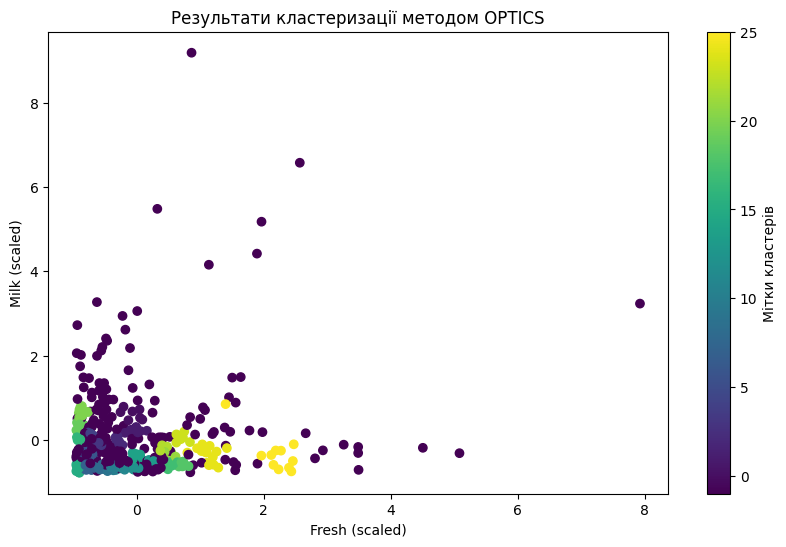

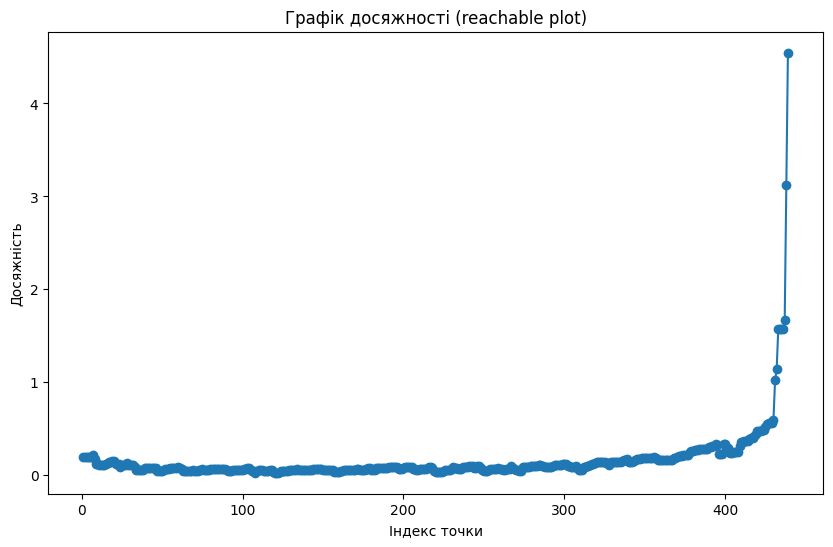

In [ ]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Завантаження даних з файлу Wholesale customers data.csv
url = '/content/Wholesale customers data.csv'
data = pd.read_csv(url)

# Вибір потрібних стовпців для кластеризації (наприклад, Fresh та Milk)
X = data[['Fresh', 'Milk']].values

# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Проведення кластеризації методом OPTICS за параметрами за замовчуванням
optics = OPTICS()
labels = optics.fit_predict(X_scaled)

# Виведення результатів кластеризації
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
percent_noise = (n_noise / len(labels)) * 100
print("Мітки кластерів:", labels)
print("Кількість кластерів:", n_clusters)
print("Відсоток некластеризованих спостережень:", percent_noise)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Fresh (scaled)')
plt.ylabel('Milk (scaled)')
plt.title('Результати кластеризації методом OPTICS')
plt.colorbar(label='Мітки кластерів')
plt.show()

# Побудова графіка досяжності (reachable plot)
reachability = optics.reachability_[optics.ordering_]
plt.figure(figsize=(10, 6))
plt.plot(reachability, marker='o')
plt.xlabel('Індекс точки')
plt.ylabel('Досяжність')
plt.title('Графік досяжності (reachable plot)')
plt.show()


In [ ]:
from sklearn.cluster import OPTICS
import numpy as np

# Задані значення для кількості кластерів та відсотка некластеризованих спостережень
desired_clusters = np.arange(5, 8)
desired_percent_noise = 12

# Задання діапазону для параметрів max_eps та min_samples
max_eps_values = [10000, 15000, 35000, 40000]
min_samples_values = [2, 6, 8, 10]

# Пошук оптимальних параметрів
params = []

for max_eps in max_eps_values:
    for min_samples in min_samples_values:
        optics = OPTICS(max_eps=max_eps, min_samples=min_samples)
        labels = optics.fit_predict(X)
        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        percent_noise = (n_noise / len(labels)) * 100
        if n_clusters in desired_clusters and percent_noise <= desired_percent_noise:
            params.append({'max_eps': max_eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'percent_noise': percent_noise})

# Виведення оптимальних параметрів
print("Оптимальні параметри для OPTICS:")
for param in params:
    print(param)


Оптимальні параметри для OPTICS:
